![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [54]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [55]:
# Get dummies
penguins_df = pd.get_dummies(penguins_df, columns=['sex'], drop_first=True, dtype=int)

penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


In [56]:
import numpy as np
samples = np.array(penguins_df)

In [57]:
#Standardise/Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
samples = scaler.fit_transform(samples)

In [58]:
inertia = []
k_values = range(1, 11)  # try 1 to 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(samples)
    inertia.append(kmeans.inertia_)  # inertia_ = WCSS

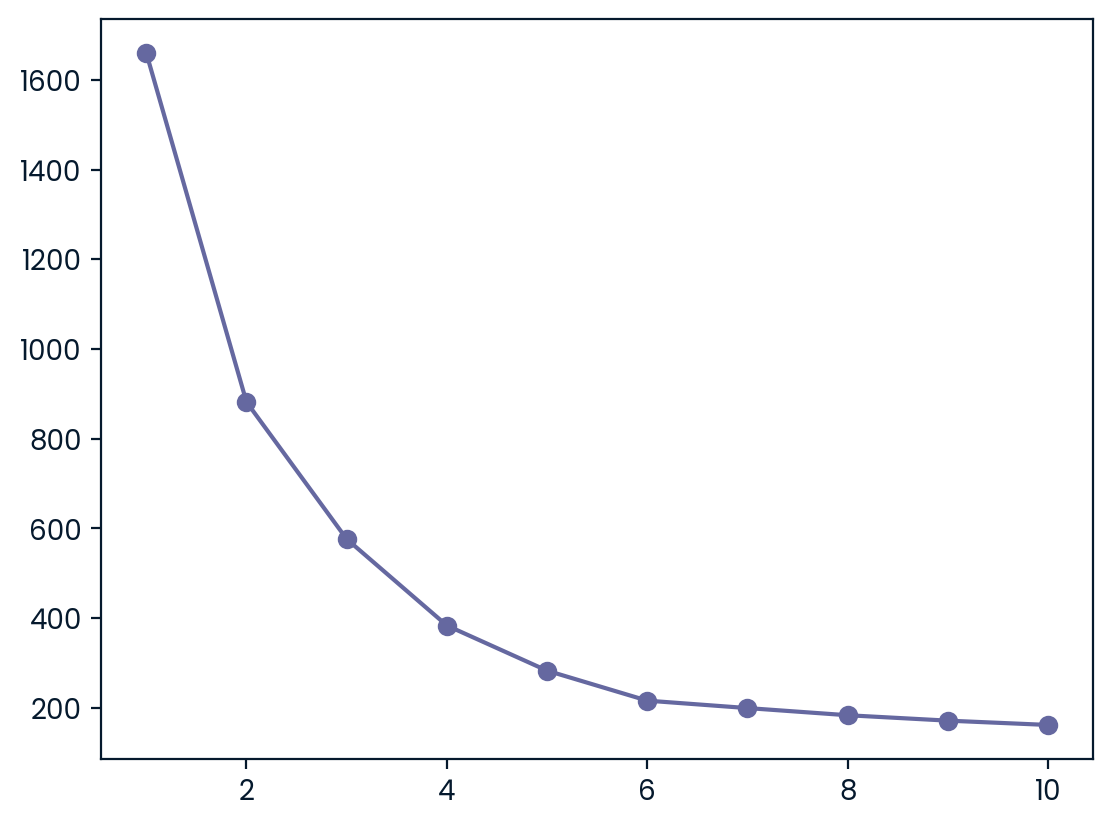

In [59]:
plt.plot(k_values, inertia, marker='o')

In [60]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(samples)

In [61]:
labels = model.predict(samples)
print(labels)

[0 2 2 2 0 2 0 2 0 2 2 0 2 0 2 0 2 0 0 2 0 2 2 0 2 0 2 0 2 0 0 2 2 0 2 0 2
 0 2 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 0 2 0 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 2 2 0 2 0 2 0 0
 2 0 2 2 0 2 0 2 0 2 0 2 0 0 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 2 2 0 2 0
 0 2 0 2 2 0 2 0 0 2 2 0 2 0 2 0 2 0 0 2 0 2 2 0 2 0 0 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


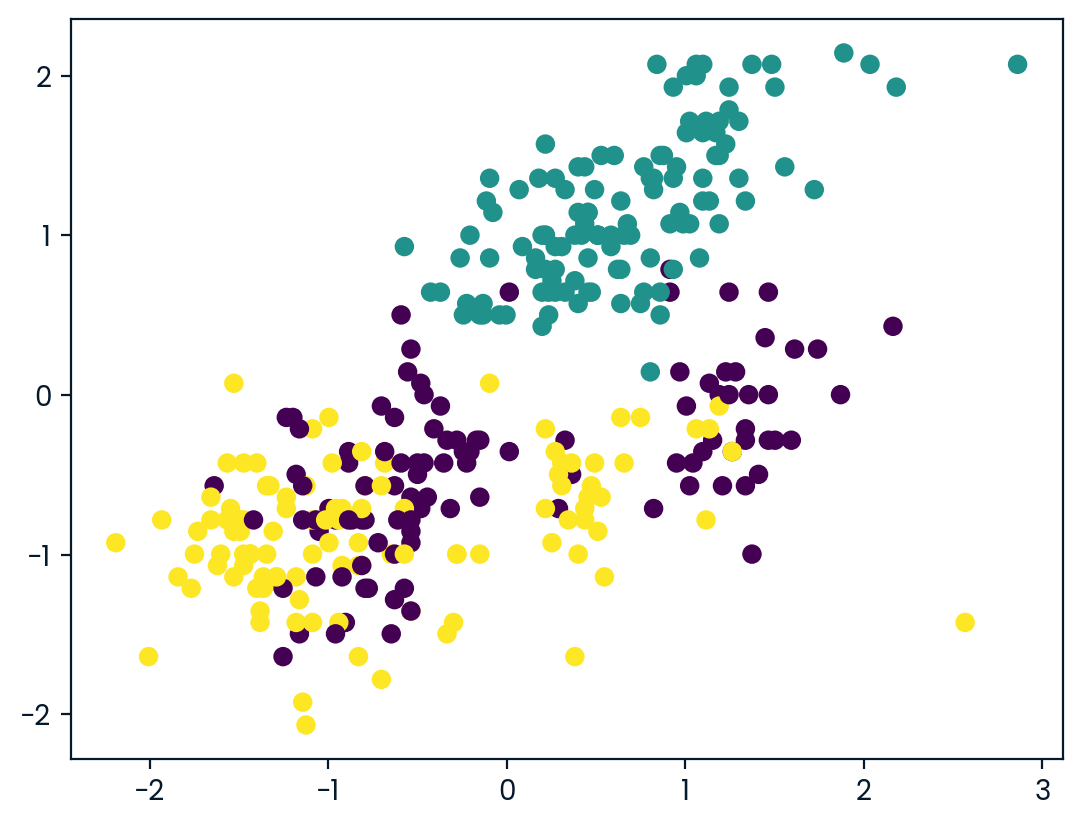

In [62]:
import matplotlib.pyplot as plt
xs =  samples[:,0]
ys = samples[:,2]
plt.scatter(xs, ys, c=labels)
plt.show()

In [63]:
numeric_columns = ["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]

In [64]:
penguins_df["label"] = kmeans.labels_

In [65]:
stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,40.217757,17.611215,189.046729,3419.158879
1,47.568067,14.996639,217.235294,5092.436975
2,43.878302,19.111321,194.764151,4006.603774
